# Assignment - 5:KNN 

## Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.spatial import distance
import time

### a)

In [2]:
def KNN_predict(X_train, y_train, X_test, K, ptype = 'classification',distance_metric='Euclidean'):
    
    all_distances = []
    for i in X_test:
        if(distance_metric == 'Euclidean'):
            distances = np.array([distance.euclidean(i,j) for j in X_train])
        elif(distance_metric == 'Cosine'):
            distances = np.array([distance.cosine(i,j) for j in X_train])
        elif(distance_metric == 'Manhattan'):
            distances = np.array([distance.cityblock(i,j) for j in X_train])
        else:
            print("Error: please enter a valid distance")
            return
        all_distances.append(distances)
    all_distances = np.array(all_distances)
    indices = np.array([np.argpartition(i, K)[:K] for i in all_distances])
    
    if(ptype == 'regression'):
        y_test = np.array([(np.mean(y_train[i])) for i in indices])
    elif(ptype == 'classification'):
        y_test = np.array([stats.mode(y_train[i])[0][0] for i in indices])
    else:
        print("Error: please enter a valid type")
        return
    return y_test

### b)

In [3]:
rt = []
ts = []
for i in range(1,25):
    ts.append(100*i)
    X_train = np.random.rand(100*i, 5)
    y_train = np.random.rand(100*i)
    X_test = np.random.rand(100, 5)
    a = time.time()
    y_test = KNN_predict(X_train, y_train, X_test, 3, ptype = 'regression',distance_metric='Euclidean')
    rt.append(time.time() - a)

In [4]:
print(rt)

[0.17169904708862305, 0.2715489864349365, 0.41638779640197754, 0.5549023151397705, 0.699937105178833, 0.8279037475585938, 1.0073018074035645, 1.1581141948699951, 1.2862112522125244, 1.4189162254333496, 1.5715618133544922, 1.755009412765503, 1.7823200225830078, 2.051042318344116, 2.1889419555664062, 2.298344850540161, 2.5897881984710693, 2.4610679149627686, 2.6556527614593506, 2.8999593257904053, 2.8393726348876953, 2.994286298751831, 3.0844788551330566, 3.219616413116455]


In [5]:
import plotly.plotly as py
import plotly.graph_objs as go


# Create a trace
trace = go.Scatter(
    x = np.array(ts),
    y = np.array(rt),
    mode = 'lines+markers'
)

layout = dict(title = 'Train instances vs Running time',
              xaxis = dict(title = 'Number of Train Instances'),
              yaxis = dict(title = 'Running Time)'),
              )

data = [trace]
fig = dict(data = data, layout = layout)

py.iplot(fig, filename='basic-line')

/home/gowtham/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



As the number of training instances increase running time also increases. Running time is directly proportional to the number of training instances.

In [6]:
rt = []
fs = []
for i in range(1,100):
    fs.append(10*i)
    X_train = np.random.rand(1000, 10*i)
    y_train = np.random.rand(1000)
    X_test = np.random.rand(100, 10*i)
    a = time.time()
    y_test = KNN_predict(X_train, y_train, X_test, 3, ptype = 'regression',distance_metric='Euclidean')
    rt.append(time.time() - a)

In [7]:
trace = go.Scatter(
    x = np.array(fs),
    y = np.array(rt),
    mode = 'lines+markers'
)

layout = dict(title = 'Features vs Running time',
              xaxis = dict(title = 'Number of Features'),
              yaxis = dict(title = 'Running Time'),
              )

data = [trace]
fig = dict(data = data, layout = layout)

py.iplot(fig, filename='basic-line')

As the number of features instances increase running time also increases. Running time is directly proportional to the number of features.

## Q2

### a)

In [8]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
data.shape

(414, 8)

In [10]:
data = data.iloc[:, 1:]

from sklearn.preprocessing import MinMaxScaler
data = data.values

In [11]:
from sklearn.model_selection import train_test_split, KFold
kf = KFold(n_splits = 5, shuffle = True)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

i = 0
errors = []

for train, test in kf.split(data):
    train_D = data[train]
    test_D = data[test]
    X_train, X_val, y_train, y_val = train_test_split(train_D[:, :-1], train_D[:, -1])
    best_rmse = 99999
    k = 0
    for i in range(1, 25):
        clf = KNeighborsRegressor(n_neighbors = i)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_pred, y_val))
        if(rmse < best_rmse):
            best_rmse = rmse
            k = i
            
    clf = KNeighborsRegressor(k)
    clf.fit(X_train, y_train)
    errors.append([k, np.sqrt(mean_squared_error(clf.predict(X_train), y_train)), np.sqrt(mean_squared_error(clf.predict(X_val), y_val)), np.sqrt(mean_squared_error(clf.predict(test_D[:, :-1]), test_D[:, -1]))])
    print(errors[-1])

[3, 6.262920336947725, 6.417215592230167, 8.46196387749258]
[3, 6.201323711161136, 8.62102594552491, 6.587966190520646]
[2, 4.120334605109701, 7.143113205393027, 11.262430883143761]
[1, 0.8445747164182121, 6.272141503198456, 7.337927549580438]
[2, 5.034501446943591, 7.378203817072625, 7.648491402342511]


Errors are lesser than the ridge and lasso regressions.So, the overall model performed better than the previous models.

### b)

No, the features are not scaled in the above implemented algorithm. Yes it might produces a wrong results in some cases. It happens when some feature have a very large and distant values whereas the other features have smaller and close values. The contribution to distace due to the larger value will be more. Hence we need to scale all the features between 0 to 1.

In [12]:
kf = KFold(n_splits = 5, shuffle = True)

i = 0
errors = []

for train, test in kf.split(data):
    train_D = data[train]
    test_D = data[test]
    X_train, X_val, y_train, y_val = train_test_split(train_D[:, :-1], train_D[:, -1])
    scaler_ = MinMaxScaler()
    X_train = scaler_.fit_transform(X_train)
    X_val = scaler_.transform(X_val)
    best_rmse = 99999
    k = 0
    for i in range(1, 25):
        clf = KNeighborsRegressor(n_neighbors = i)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_pred, y_val))
        if(rmse < best_rmse):
            best_rmse = rmse
            k = i
            
    clf = KNeighborsRegressor(k)
    clf.fit(X_train, y_train)
    errors.append([k, np.sqrt(mean_squared_error(clf.predict(X_train), y_train)), np.sqrt(mean_squared_error(clf.predict(X_val), y_val)), np.sqrt(mean_squared_error(clf.predict(scaler_.transform(test_D[:, :-1])), test_D[:, -1]))])
    print(errors[-1])

[5, 5.964616365458618, 6.284834299221794, 11.806458106140392]
[6, 6.125356766729042, 10.721695872522444, 8.328433700177946]
[16, 8.72867318328362, 9.0471218714366, 7.691992210354652]
[6, 8.389896677757173, 6.483235253901381, 6.518284190014565]
[10, 8.626863619161627, 6.7464118084472595, 7.226252697545284]


Yes it produced better results

### c)

In [13]:
X = data[:, :-1]
y = data[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

errors = []
for i in range(1, 25):
    reg = KNeighborsRegressor(i)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    errors.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
trace = go.Scatter(
    x = np.array(range(1, 25)),
    y = np.array(errors),
    mode = 'lines+markers'
)

layout = dict(title = 'K vs RMSE',
              xaxis = dict(title = 'K'),
              yaxis = dict(title = 'RMSE'),
              )

data = [trace]
fig = dict(data = data, layout = layout)

py.iplot(fig, filename='basic-line')

/home/gowtham/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Rmse gradually decreases and then started to increased.

### d)

In [14]:
reg = KNeighborsRegressor(6)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

vals = np.absolute(y_pred - y_test)
max_error_i = np.argmax(vals)
features = scaler.inverse_transform(np.array([X_test[max_error_i]]))

In [15]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx')
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [16]:
print(features)

[[2013.3333333   37.2        186.5101       9.          24.97703
   121.54265  ]]


This point(home) is an outlier in the given data. Increase value of K to predict well even for the outliers. Decreasing the number of dimnsions can also help improve the performance of this house.

## Q3

In [17]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)

In [18]:
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

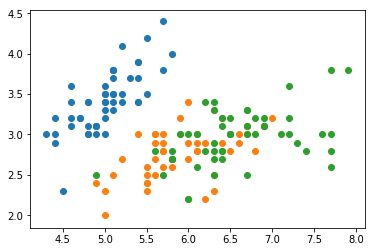

In [20]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])
plt.scatter(X[:, 0][y==2], X[:, 1][y==2])

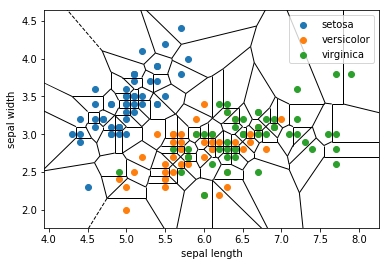

In [21]:
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(X)
voronoi_plot_2d(vor, show_points = False, show_vertices = False)
setosa = plt.scatter(X[:, 0][y==0], X[:, 1][y==0])
versicolor = plt.scatter(X[:, 0][y==1], X[:, 1][y==1])
virginica = plt.scatter(X[:, 0][y==2], X[:, 1][y==2],)
plt.legend([setosa, versicolor, virginica], ['setosa', 'versicolor', 'virginica'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

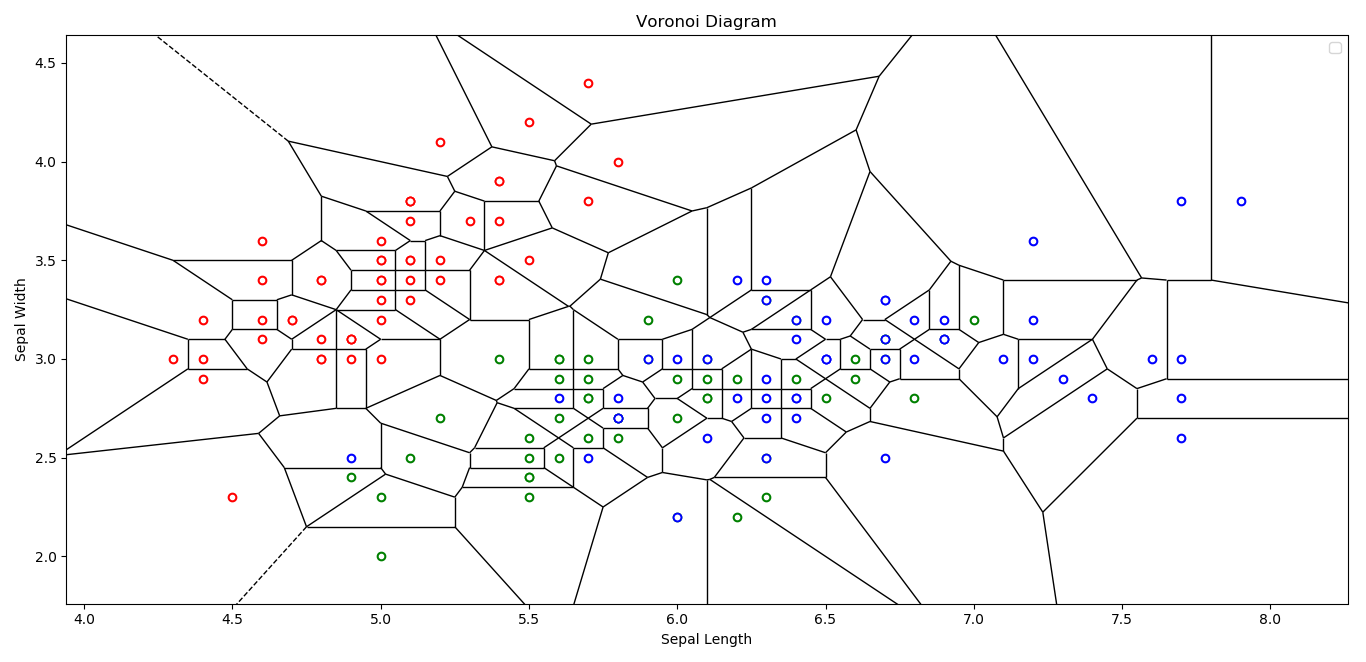

In [22]:
from IPython.display import Image
Image(filename='voronoi_d.png') 

**Observation**: All the setosa flowers lies in a single region seperated completly from the rest in the sepal height and width dimensional space. Versicolor and virginica are mixed in a region and cannot be separated from a single line like setosa. It is also possible to locate flowers which are weird(anamoly detection) easily from the diagram(outliers). 